# Problem 4

Problem 4 (70 points) In a Machine Learning class at the VEF Academy, the students, the gender, and the scores are given in Table 1. A csv file of Table 1 can be downloaded from the Google form.

<img src="img/P4.png" width="50%">

# Solution

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('screening_test_problem_4.csv')
df.head()

,Student,Gender,Midterm1,Midterm2,Final
0,Thanh,M,7,6,8
1,Hoai,F,9,8,8
2,Andy,M,10,8,9
3,Beatrix,F,6,7,7
4,Wen,M,5,6,7


## (a) 

Use a linear regression model to regress the Final score against the Midterm 1 score and Midterm 2 score. What are the coefficients (including the intercept) that you get from the model? What is the coefficient of determination (R2) of the model?

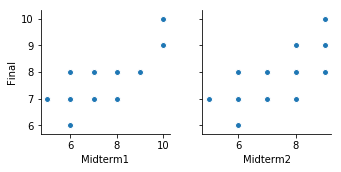

In [36]:
sns.pairplot(df, x_vars=['Midterm1','Midterm2'], y_vars='Final')

In [35]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

var_a = ['Midterm1', 'Midterm2']
reg_a = smf.ols('Final ~ Midterm1 + Midterm2', data=df).fit()
#print(reg_a.summary())
y_pred_a = reg_a.predict(df[var_a])

In [5]:
print('Coefficients: \n', reg_a.params)
print('R squared: \n', reg_a.rsquared)

Coefficients: 
 Intercept    3.577207
Midterm1     0.300200
Midterm2     0.263191
dtype: float64
R squared: 
 0.6163286853459398


## (b) 
Now include the gender information as another independent variable in your linear regression model. How do you represent the gender information? What are the coefficients (including the intercept) that you get from this linear regression model? What is the coefficent of determination (R2) of the model?

The gender variable is a binary variable so it should be encode to a vector of [0, 1] with 0 for female and 1 for male.

In [16]:
df['encodedGender'] = (df.Gender == 'M').astype('int')
df.head()

,Student,Gender,Midterm1,Midterm2,Final,encodedGender
0,Thanh,M,7,6,8,1
1,Hoai,F,9,8,8,0
2,Andy,M,10,8,9,1
3,Beatrix,F,6,7,7,0
4,Wen,M,5,6,7,1


In [10]:
var_b = ['Midterm1', 'Midterm2', 'encodedGender']
reg_b = smf.ols('Final ~ Midterm1 + Midterm2 + encodedGender', data=df).fit()
#print(reg_a.summary())
y_pred_b = reg_b.predict(df[var_b])

In [18]:
print('Coefficients:')
print(reg_b.params)
print('R squared: \n', reg_b.rsquared)

Coefficients:
Intercept        3.902470
Midterm1         0.294900
Midterm2         0.237785
encodedGender   -0.181914
dtype: float64
R squared: 
 0.6251919819357614


Comment in both models:

1. Both have not so good R-squared (~0.6) which indicate that about 60% of the variation of Final score could be explained by the independent variable (Midterm1, Midterm2 (and Gender in the seconde model)). The rest (40%) is explained by unknown factors.
2. There a overestimation with the low values and underestimation with the high ones.
    

## (c) 
Consider the problem of using the available data in Table 1 (Gender information, Midterm 1 scores, Midterm 2 scores) to predict the Final scores. Andy, a student in the class, claim that, for this dataset, gender information will help improve the predicting power. In orther words, using all gender information, Midterm 1 scores, and Midterm2 scores to predict the Final scores will be better than just using Midterm 1 scores and Midterm 2 scores. Is this claim correct? Show your reasoning / proof.

In [50]:
rsqTable = pd.DataFrame(
    {
        'Model': ['A', 'B'],
        'R squared': [reg_a.rsquared,reg_b.rsquared]
    }
)
rsqTable

,Model,R squared
0,A,0.616329
1,B,0.625192


The above table presents the $R^2$ values of both reported model. Although the model B (Midterm1, Midterm2, Gender) has higher $R^2$, we can not state that it has better performance in predicting. Because $R^2$ just represent the proportion of the variance for a dependent variable that's explained by an independent variable. In fact, $R^2$ usually increases when adding new independent variable. Regarding to predicting power, $R^2$ is quite inconsequential.

In order to assessing the performance of the models, there are several approaches. In this report, **cross-validation** and **criteria selection** are used. 

### Cross validation

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
Xa = df[['Midterm1', 'Midterm2']]
Xb = df[['Midterm1', 'Midterm2', 'encodedGender']]
y = df.Final
cv_a = cross_val_score(lm, Xa, y, cv=5, scoring="neg_mean_squared_error")
cv_b = cross_val_score(lm, Xb, y, cv=5, scoring="neg_mean_squared_error")
score_a = -cv_a
score_b = -cv_b

In [55]:
perfTable = pd.DataFrame(
    {
        'Model': ['A', 'B'],
        'R squared': [reg_a.rsquared,reg_b.rsquared],
        'Average RMSE': [score_a.mean(), score_b.mean()]
    }
)
perfTable

,Model,R squared,Average RMSE
0,A,0.616329,0.425726
1,B,0.625192,0.472580


**RMSE** or **Root-Mean-Square Error** is the measure of the distance between predicted values and the actual values. The higher RMSE means the actual values are more widely spread from the fitted line. So RMSE is something we need to minimize; in other words, the smaller RMSE is, the better model is.

So that, Model A (Midterm1, Midterm2) with lower RMSE (0.425726 < 0.472580)  is better than Model B  in term of model performance.

### Criteria

In [25]:
perfTable = pd.DataFrame(
    {
        'Model': ['A', 'B'],
        'R squared': [reg_a.rsquared,reg_b.rsquared],
        'AIC': [reg_a.aic, reg_b.aic],
        'BIC': [reg_a.bic, reg_b.bic]
    }
)
perfTable

,Model,R squared,AIC,BIC
0,A,0.616329,38.820322,41.807519
1,B,0.625192,40.352876,44.335806


AIC (or Akaike information criterion) and BIC (Bayesian information criterion) are both penalized-likelihood criteria. The better model have smaller AIC (BIC).

According to the above table, Model A (Midterm1, Midterm2) have smaller AIC (38.820322 < 40.352876) and BIC (41.807519 < 44.335806); so Model A have better performance than Model B.

*Comment:*

We also consider the p-value in Model B (see Appendix) the p-value of encodedGender is high (0.5) which indicates that this variable is not significant.

## (d) 
Suppose that we have a dataset as in Table 1 with a large enough number of rows. Suppose further that due to database errors, several Midterm 1 scores and Midterm 2 scores in Table 1 became null. However, you still want to use this dataset to train and test a model. Present three methods that you can use to handle the missing values and discuss the advantages and disadvantages of each method.

1. Ignore the record having null values

  + Advantage: 
    - Handle easily

  + Disadvantage:
    - Lose data, 
    - Not suitable for dataset have many null values

2. Fill in missing values with the mean or the median

  + Advantage:
    - Do not lose the data
    - Not quite hard to handle

  + Disadvantage:
    - Bias the model because the mean or the median is not exactly the real values of all missing values

3. Using model of data which is full of values to predict the missing values

  + Advantage:
    - Do not bias the model

  + Disadvantage:
    - Not easy to handle

## (e) 
Suppose that we have a dataset as in Table 1 with large enough number of rows. Consider the problem of using the available data in Table 1 (Gender information, Midterm1 scores, Midterm 2 scores) to predict the Final scores. Present two ensemble methods that you can use to solve this problem. Discuss the advantages and disadvantages of each method.

### Random forest:
> Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. (*Wikipedia*)

#### Advantages:
- Performance is usually good.
- Used for both regression and classification problems.
- Could be used for both numerical and categorical feature without scaling. RF also handle missing data well thank to CART method which replaces the missing with the mean or other reasonable value.
- Easy to build with 2 main hyperparameters: number of trees (m) and number of features (n), m is usually recommended around $\sqrt{n}$ for classification or $n/3$ for regression. [1, 2]
- Because of using a random subset of features on each training epoch, RF could handle overfitting well. Random feature selection also help reducing the bias. In the other hand, the variance is kept low due to ensemble of unprunned tree.
- The results of variable importance which is extracted from random forest model could be used as a feature selection tools.


#### Disadvantages:
- There are many model to build so the computation cost may be slow in the large dataset or big model.
- Less interpretable than the original decision tree because we can not examine the individual tree in the forest. 


### Gradient boosting
> Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function. (*Wikipedia*)

#### Advantages
- The performance is really good, sometimes better than random forest. [3]
- Could be used for both numerical and categorical feature without scaling.
- Variable importance is also available.

#### Disadvantages
- There are many hyperparameters to tune: number of trees, number of leaves (depth), learning rate,... The right choices depend on each problem.
- Because of countinuous minimization of error on each training epoch, the GB model could be overfitting. So it is good idea to perform large grid search to find out the good model.
- Also less interpretable.

# Citation
[1] James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning (Vol. 112). New York: springer

[2] Friedman, J., Hastie, T., & Tibshirani, R. (2001). The elements of statistical learning (Vol. 1, No. 10). New York, NY, USA:: Springer series in statistics.

[3] Olson, R. S., La Cava, W., Mustahsan, Z., Varik, A., & Moore, J. H. (2017). Data-driven advice for applying machine learning to bioinformatics problems. arXiv preprint arXiv:1708.05070.

# Appendix

In [58]:
reg_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Final   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     8.896
Date:                Sun, 28 Oct 2018   Prob (F-statistic):            0.00106
Time:                        08:16:16   Log-Likelihood:                -16.176
No. Observations:                  20   AIC:                             40.35
Df Residuals:                      16   BIC:                             44.34
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.9025      1.035      3.771      0.002       1.708       6.097
Midterm1          0.2949      0.110      2.674      0.017       0.061       0.529
Midterm2          0.2378      0.156      1.525      0.147      -0.093       0.568
encodedGender    -0.1819      0.296     -0.615      0.547      -0.809       0.445
==============================================================================
Omnibus:                        2.634   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.268   Jarque-Bera (JB):                1.187
Skew:                           0.109   Prob(JB):                        0.552
Kurtosis:                       1.826   Cond. No.                         82.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

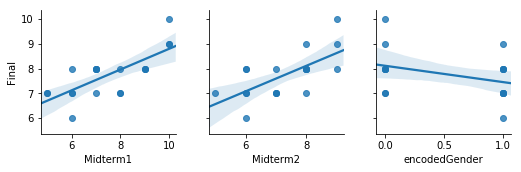

In [46]:
sns.pairplot(df, x_vars=['Midterm1','Midterm2', 'encodedGender'], y_vars='Final', kind='reg')

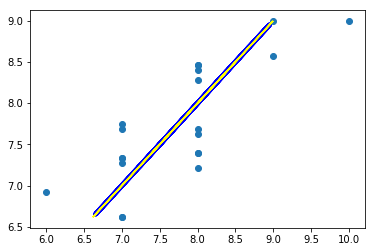

In [15]:
plt.scatter(df.Final, y_pred_b)
plt.plot(y_pred_a, y_pred_a, linewidth = 5, color='blue')
plt.plot(y_pred_b, y_pred_b, color='yellow')